(8807, 12)
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2

<ipython-input-8-807847699>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)
<ipython-input-8-807847699>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

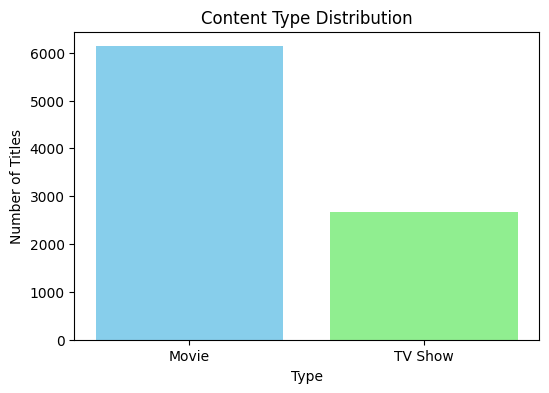

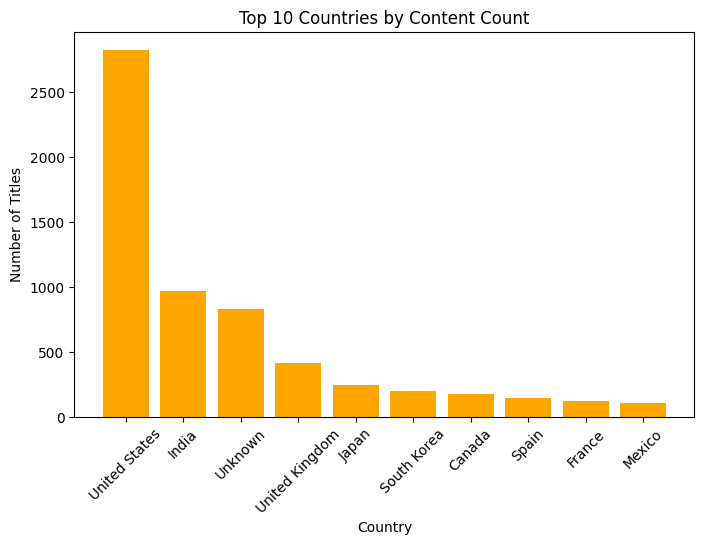

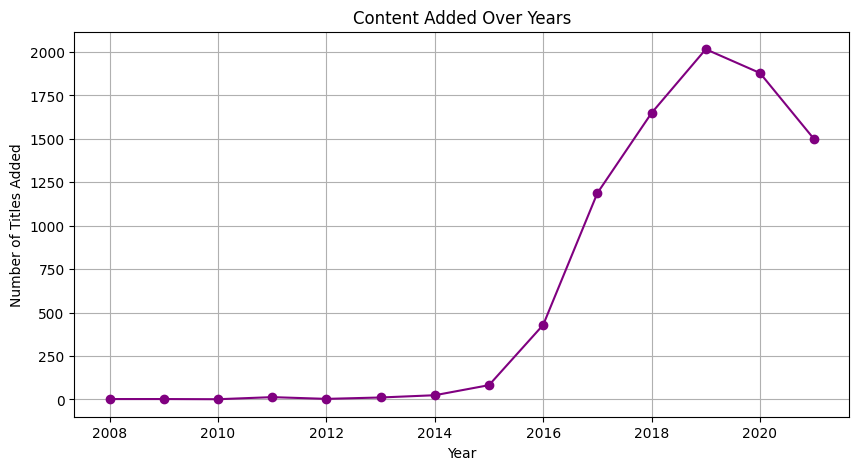

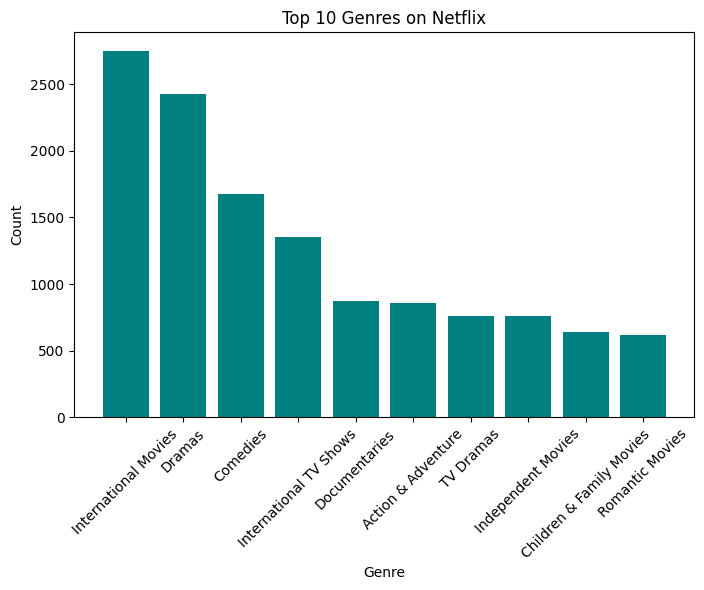

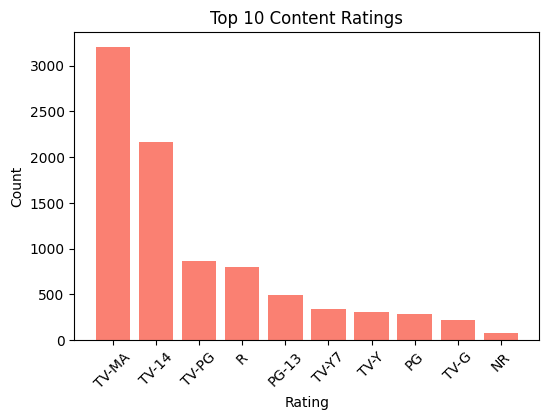

<ipython-input-8-807847699>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.loc[:, 'duration_mins'] = movies['duration'].str.replace(' min', '')


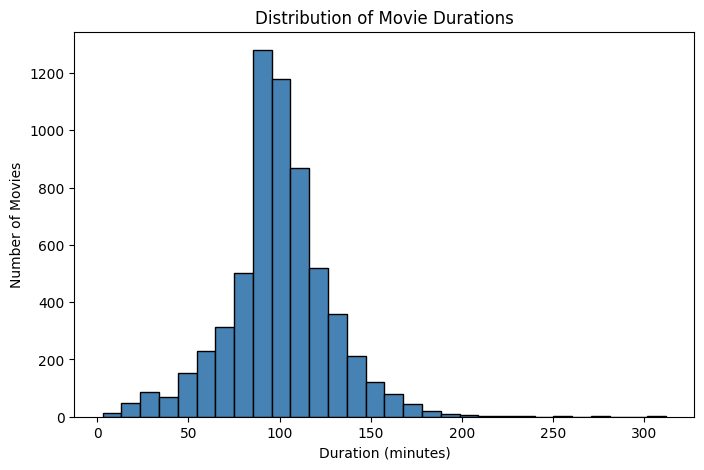

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('netflix_titles.csv')
print(df.shape)
print(df.head())

# Convert 'date_added' to datetime
# Added format='mixed' to handle potential variations in date format strings
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

# Fill missing values
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['duration'].fillna('Unknown', inplace=True)

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Content Type Distribution
type_counts = df['type'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'lightgreen'])
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Number of Titles')
plt.show()

# Top 10 Countries Producing Content
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(8,5))
plt.bar(top_countries.index, top_countries.values, color='orange')
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

# Content Added Per Year
year_counts = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(year_counts.index, year_counts.values, marker='o', color='purple')
plt.title('Content Added Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()

# Split genres and count them
genre_split = df['listed_in'].dropna().str.split(', ')
genres_flat = [genre for sublist in genre_split for genre in sublist]
genre_counts = pd.Series(genres_flat).value_counts().head(10)

plt.figure(figsize=(8,5))
plt.bar(genre_counts.index, genre_counts.values, color='teal')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Rating Distribution
top_ratings = df['rating'].value_counts().head(10)

plt.figure(figsize=(6,4))
plt.bar(top_ratings.index, top_ratings.values, color='salmon')
plt.title('Top 10 Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Movie Duration Distribution
# Filter movies only
movies = df[df['type'] == 'Movie']

# Extract duration number
# Using .loc to avoid SettingWithCopyWarning
movies.loc[:, 'duration_mins'] = movies['duration'].str.replace(' min', '')
movies.loc[:, 'duration_mins'] = pd.to_numeric(movies['duration_mins'], errors='coerce')

# Drop NaNs
movies = movies.dropna(subset=['duration_mins'])

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(movies['duration_mins'], bins=30, color='steelblue', edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()